# Designing a pipeline to rank reviews on drugs

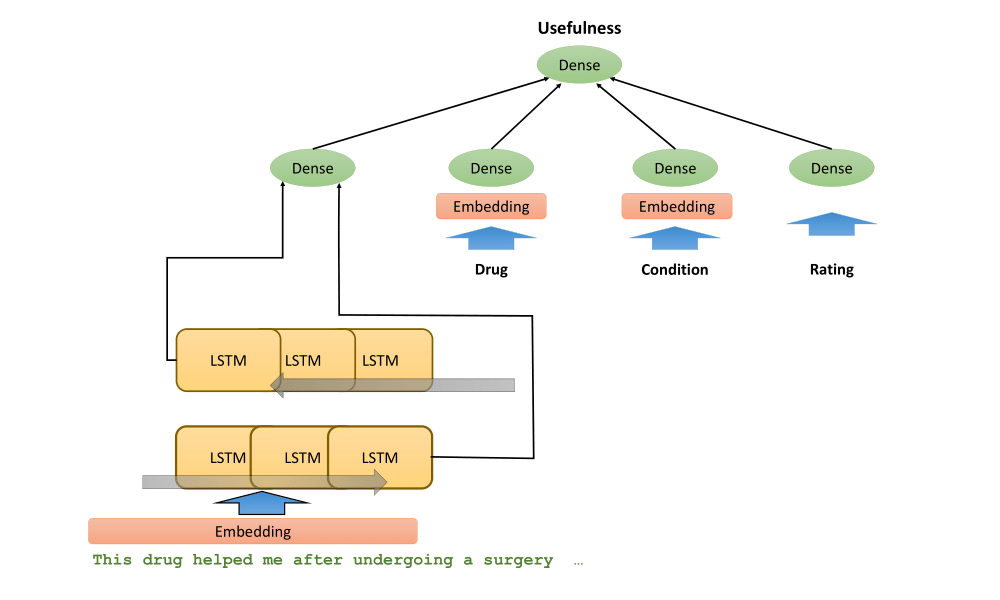



In [1]:
from rankDrugRev import RankDrugRev
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

## model training

In [2]:
# instantiating the model class 
revRank_model = RankDrugRev()

In [4]:
# loading default dataset (https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29)  
revRank_model.load_data() 
revRank_model.raw_data_train.head(10)

,id,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,2012-05-20,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,2010-04-27,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,2009-12-14,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,2015-11-03,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,2016-11-27,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2.0,2015-11-28,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1.0,2017-03-07,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,2015-03-14,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1.0,2016-08-09,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8.0,2016-12-08,1


In [5]:
# fitting preprocessesing pipeline 
revRank_model.fit_preprocess()

In [6]:
# applying the pipeline
X, y, idx_known = revRank_model.transform_preprocess(data = 'train')  

In [10]:
# modeling the train set using GPU and cuDNN
model, history = revRank_model.lstm_model(X, y, pretrained = False)

Epoch 1/4
3323/3323 [==============================] - 1221s 365ms/step - loss: 0.6888 - val_loss: 0.5859
Epoch 2/4
3323/3323 [==============================] - 1205s 363ms/step - loss: 0.5498 - val_loss: 0.5534
Epoch 3/4
2490/3323 [=====================>........] - ETA: 4:34 - loss: 0.5147

KeyboardInterrupt: 

In [ ]:
y = model.predict(X)

In [ ]:
# deploying trained model on unseen test data set that is already load by executing .load_data()
X_test, y_test, idx = revRank_model.transform_preprocess(data = 'test')
y_test_pred = model(X)

In [ ]:
# pltting observed and predicted test 

In [ ]:
# saving trained model

# revRank_model.save_model("preprcc.dill", "lstm_model.h5", model = model)

## using the pre-trained model 

In [ ]:
from rankDrugRev import RankDrugRev
rsave_model_model, lstm_model = RankDrugRev.load_model("preprcc.dill", "lstm_model.h5")